In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.datasets import load_boston
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
house_price = load_boston()

/home/eshaan/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dat

In [3]:
house_price.data = preprocessing.scale(house_price.data)

In [4]:
x_train,x_test,y_train,y_test = train_test_split(house_price.data,house_price.target,test_size=0.3,random_state=10)

In [5]:
ols = LinearRegression()
ols.fit(x_train,y_train)

LinearRegression()

In [25]:
ols_pred = ols.predict(x_test)

In [7]:
mean_squared_error(y_test,ols_pred)

29.326596526123286

In [8]:
np.sqrt(mean_squared_error(y_test,ols_pred))

5.415403634644724

In [11]:
ols_pred = ols.predict(x_train)
print(mean_squared_error(y_train,ols_pred))
print(np.sqrt(mean_squared_error(y_train,ols_pred)))

19.45968013480259
4.411312745068365


In [12]:
ridge_reg = Ridge(alpha=7)
ridge_reg.fit(x_train,y_train)

Ridge(alpha=7)

In [13]:
pred = ridge_reg.predict(x_test)
pred_train = ridge_reg.predict(x_train)

In [14]:
mean_squared_error(y_test,pred)

29.25485390843569

In [15]:
np.sqrt(mean_squared_error(y_test,pred)) - np.sqrt(mean_squared_error(y_train,pred_train))

0.9892008351121708

In [16]:
ols.coef_

array([-1.32140428,  1.51483181, -0.16626579,  0.41157944, -1.77116763,
        2.35282088,  0.31849871, -3.25664538,  2.63257618, -2.05946639,
       -1.75520086,  1.18114343, -3.88704342])

In [17]:
ridge_reg.coef_

array([-1.22649245,  1.37390295, -0.27471251,  0.44043478, -1.54749546,
        2.4422406 ,  0.23737331, -2.97856347,  2.10391629, -1.596039  ,
       -1.70090072,  1.17061688, -3.75650945])

In [18]:
# Initialize
ridge_reg = Ridge(alpha=0)
ridge_reg.fit(x_train,y_train)
ridge_df = pd.DataFrame({'variable':house_price.feature_names,'estimate':ridge_reg.coef_})
ridge_train_pred = []
ridge_test_pred = []

In [19]:
for alpha in np.arange(0,20000,10):
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(x_train,y_train)
    var_name = 'estimate: '+str(alpha)
    ridge_df[var_name] = ridge_reg.coef_
    ridge_train_pred.append(ridge_reg.predict(x_train))
    ridge_test_pred.append(ridge_reg.predict(x_test))
ridge_df = ridge_df.set_index('variable').T.rename_axis('estimate').rename_axis(None).reset_index()

/tmp/ipykernel_151488/4173996058.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  ridge_df[var_name] = ridge_reg.coef_
/tmp/ipykernel_151488/4173996058.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  ridge_df[var_name] = ridge_reg.coef_
/tmp/ipykernel_151488/4173996058.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, u

In [20]:
ridge_df

variable,index,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,estimate,-1.321404,1.514832,-0.166266,0.411579,-1.771168,2.352821,0.318499,-3.256645,2.632576,-2.059466,-1.755201,1.181143,-3.887043
1,estimate: 0,-1.321404,1.514832,-0.166266,0.411579,-1.771168,2.352821,0.318499,-3.256645,2.632576,-2.059466,-1.755201,1.181143,-3.887043
2,estimate: 10,-1.193657,1.325447,-0.304917,0.449609,-1.469514,2.469669,0.209286,-2.874606,1.938392,-1.458673,-1.681815,1.165560,-3.705482
3,estimate: 20,-1.105483,1.197361,-0.369743,0.472252,-1.262259,2.530310,0.134469,-2.578411,1.535569,-1.145209,-1.629226,1.146799,-3.552106
4,estimate: 30,-1.038807,1.103712,-0.405497,0.487388,-1.111110,2.559392,0.079040,-2.340750,1.268128,-0.958037,-1.587433,1.126071,-3.419021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,estimate: 19950,-0.050862,0.061539,-0.072222,0.019194,-0.063206,0.093908,-0.057755,0.038167,-0.053810,-0.068353,-0.072748,0.049963,-0.106821
1997,estimate: 19960,-0.050839,0.061511,-0.072189,0.019184,-0.063178,0.093863,-0.057730,0.038152,-0.053787,-0.068323,-0.072715,0.049940,-0.106771
1998,estimate: 19970,-0.050816,0.061483,-0.072157,0.019175,-0.063150,0.093819,-0.057704,0.038136,-0.053763,-0.068292,-0.072681,0.049917,-0.106721
1999,estimate: 19980,-0.050793,0.061456,-0.072125,0.019165,-0.063122,0.093774,-0.057679,0.038120,-0.053740,-0.068262,-0.072647,0.049894,-0.106671


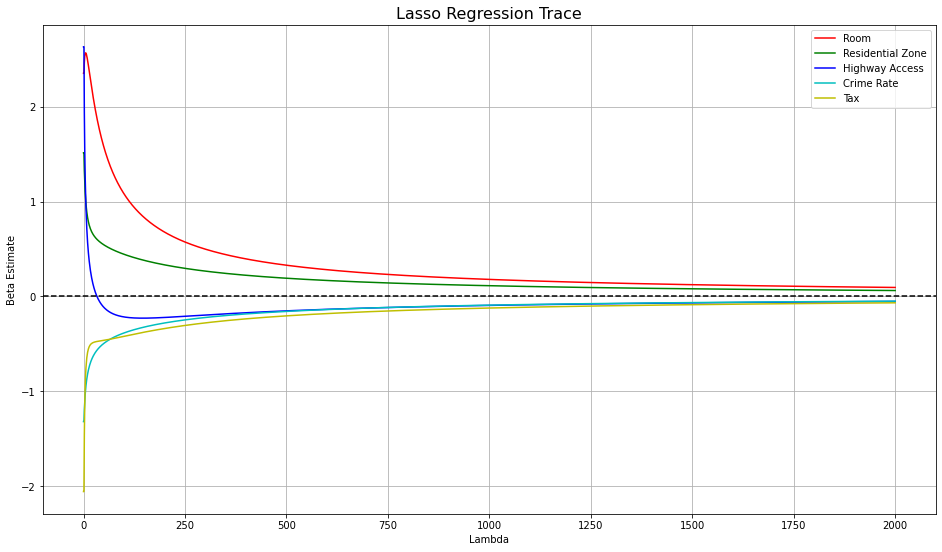

In [23]:
fig,ax = plt.subplots(figsize=(16,9))
ax.plot(ridge_df.RM,'r',ridge_df.ZN,'g',ridge_df.RAD,'b',ridge_df.CRIM,'c',ridge_df.TAX,'y')
ax.axhline(y=0,color='black',linestyle='--')
ax.set_xlabel('Lambda')
ax.set_ylabel('Beta Estimate')
ax.set_title('Lasso Regression Trace',fontsize=16)
ax.legend(labels=['Room','Residential Zone','Highway Access',"Crime Rate",'Tax'],loc='best')
ax.grid(True)

Text(0, 0.5, 'MSE')

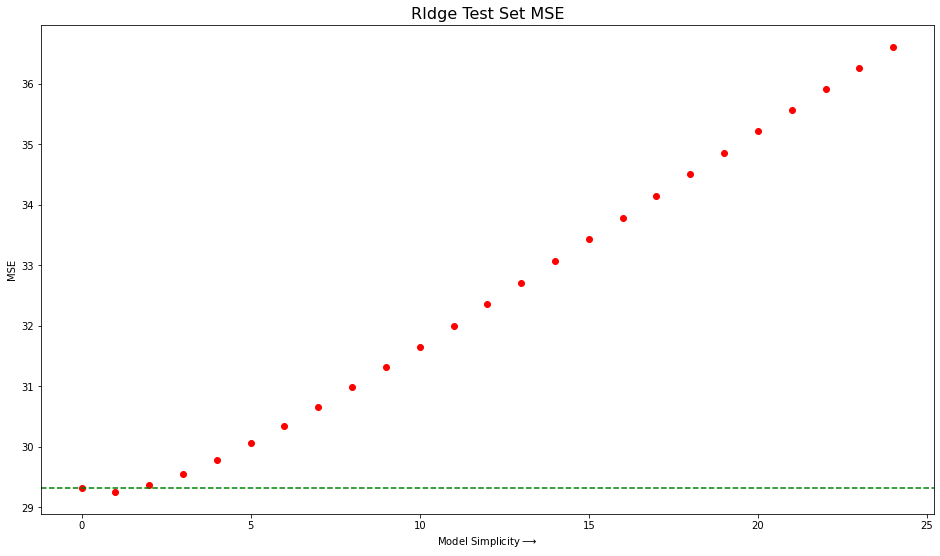

In [26]:
ridge_mse_test = [mean_squared_error(y_test,p) for p in ridge_test_pred]
ols_mse = mean_squared_error(y_test,ols_pred)
plt.figure(figsize=(16,9))
plt.plot(ridge_mse_test[:25],'ro')
plt.axhline(y=ols_mse,color='g',linestyle = '--')
plt.title('RIdge Test Set MSE',fontsize = 16)
plt.xlabel('Model Simplicity$\longrightarrow$')
plt.ylabel('MSE')